# TP 4 - Learning on LOBs

## 1. Predictive power of imbalance on future price movements

Choose one of the 10 assets and use the entire database (the year 2011).

Calculate the signed imbalance on your database.

$$\mbox{Imb} = \frac{Q_{ask}-Q_{bid}}{Q_{ask}+Q_{bid}}$$

Calculate for various time horizons $h$ (between 1 and 10 for example) the difference between the current price and the future price at time horizon $h$ in basis points (bps).

$$\mbox{diff}(h)=100\times100\times\frac{P_{t+h}-P_t}{P_t}$$

Deduce the predictive power of imbalance on $\mbox{diff}(h)$ as a function of different values of $h$ (regression). You can round the imbalance to $10^{-1}$ and `groupby` the price movements for a given $h$ horizon according to the value of the imbalance.

Study the relationship for the different $h$ horizons considered. Comment on your results.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from HDF file
stock_data = pd.read_hdf('SANOFI.h5')

# Calculate order book imbalance
stock_data['Imbalance'] = (stock_data['AskQty'] - stock_data['BidQty']) / (stock_data['AskQty'] + stock_data['BidQty'])

# Compute average traded quantity
average_traded_qty = stock_data['TradedQty'].mean()

# Calculate price differences for various horizons
for horizon in range(1, 11):
    stock_data[f'PriceDiff_{horizon}'] = 10 ** 4 * (stock_data['TradedPrice'].shift(periods=horizon).values - stock_data['TradedPrice'].shift(periods=-horizon).values) / stock_data['TradedPrice'].shift(periods=-horizon).values

# Select relevant features for modeling
model_data = stock_data[['BidQty', 'AskQty']]

# Normalize traded quantity
model_data['NormalizedQty'] = stock_data['TradedQty'] / average_traded_qty

# Create lagged features for traded signs
for lag in range(1, 11):
    model_data[f'TradedSign_lag{lag}'] = stock_data['TradedSign'].shift(lag)

# Compute order book imbalance
model_data['Imbalance'] = (model_data['AskQty'] - model_data['BidQty']) / (model_data['BidQty'] + model_data['AskQty'])

# Calculate price differences for different prediction horizons
for horizon in range(1, 11):
    diff_column_name = f'PriceDiff_{horizon}_bp'
    model_data[diff_column_name] = 10 ** 4 * (stock_data['TradedPrice'].shift(periods=horizon).values - stock_data['TradedPrice'].shift(periods=-horizon).values) / stock_data['TradedPrice'].shift(periods=-horizon).values

# Display the first 20 rows of the processed data
model_data.head(20)

<ipython-input-10-c87eaf104a2c>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data['NormalizedQty'] = stock_data['TradedQty'] / average_traded_qty
<ipython-input-10-c87eaf104a2c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_data[f'TradedSign_lag{lag}'] = stock_data['TradedSign'].shift(lag)
<ipython-input-10-c87eaf104a2c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

,BidQty,AskQty,NormalizedQty,TradedSign_lag1,TradedSign_lag2,TradedSign_lag3,TradedSign_lag4,TradedSign_lag5,TradedSign_lag6,TradedSign_lag7,...,PriceDiff_1_bp,PriceDiff_2_bp,PriceDiff_3_bp,PriceDiff_4_bp,PriceDiff_5_bp,PriceDiff_6_bp,PriceDiff_7_bp,PriceDiff_8_bp,PriceDiff_9_bp,PriceDiff_10_bp
Time,,,,,,,,,,,,,,,,,,,,,
2011-01-03 09:00:01.800,4600,107100,0.130521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.800,4600,107100,0.050200,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.800,4600,107100,0.100401,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.800,4600,107100,0.100401,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.800,4600,107100,0.135541,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.800,4600,107100,0.296183,1.0,1.0,1.0,1.0,1.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.800,4600,107100,0.125501,1.0,1.0,1.0,1.0,1.0,1.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2011-01-03 09:00:01.800,4600,107100,0.346383,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2011-01-03 09:00:01.800,4600,107100,0.170681,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


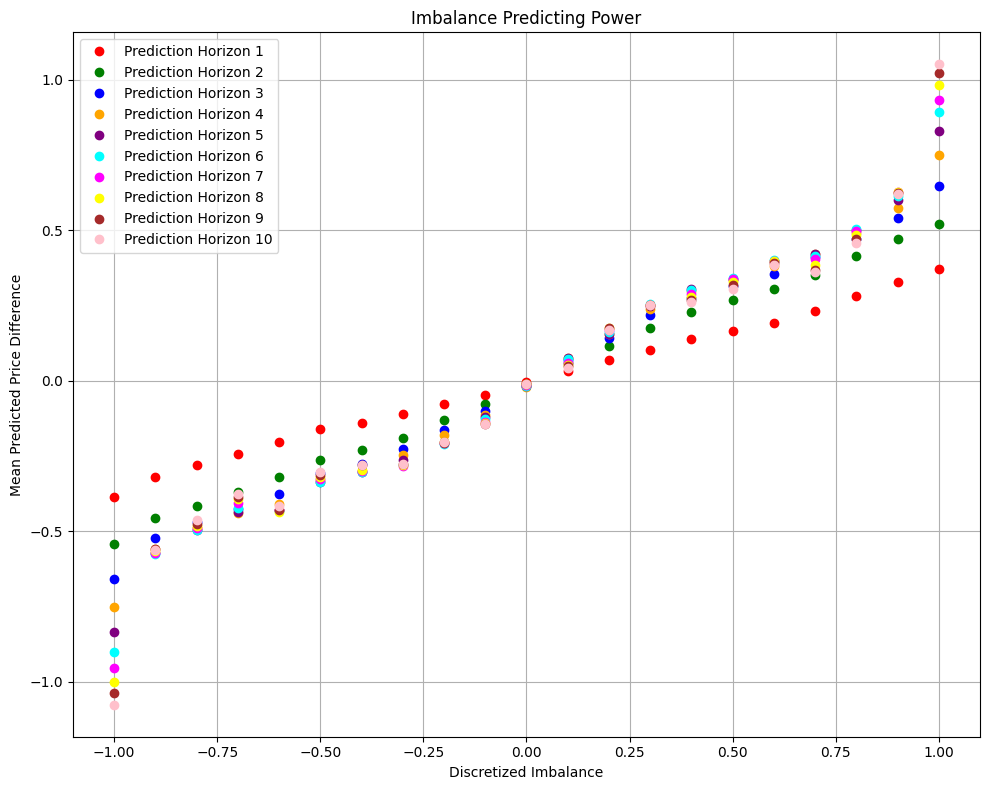

In [ ]:
import matplotlib.pyplot as plt

# Define colors for plotting
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink']

# Create a new figure
plt.figure(figsize=(10, 8))

# Create subplot
ax1 = plt.subplot(111)

# Round imbalance values for discretization
discretized_imbalance = model_data['Imbalance'].round(1)

# Plot mean predicted imbalance for each prediction horizon
for pred_horizon in range(1, 11):
    # Generate column name for price difference
    diff_column_name = f'PriceDiff_{pred_horizon}_bp'

    # Compute mean predicted imbalance for each discrete imbalance value
    mean_predicted_imbalance = model_data.groupby(discretized_imbalance)[[diff_column_name]].mean()

    # Plot the mean predicted imbalance values
    plt.plot(mean_predicted_imbalance.index, mean_predicted_imbalance.values.flatten(), 'o', label=f'Prediction Horizon {pred_horizon}', color=colors[pred_horizon - 1])

# Set plot title and labels
plt.title('Imbalance Predicting Power', size=12)
plt.xlabel('Discretized Imbalance')
plt.ylabel('Mean Predicted Price Difference')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 2. Improve previous results using neural networks and transaction sign memory

Add as variables:
* the sign of the last 10 transactions (`TradedSign`),
* transaction volume renormalized by ATS (Average Trading Size),
* best bid and ask volumes.

Based on the signs of the last 10 transactions, the volumes at best bid and best ask, the renormalized transaction volume and the imbalance, we'll try to predict the future increase ($mbox{diff}(h)$) in the price with the help of a MLP (MutliLayer Perceptron) using `tensorflow`.

### a. Install TensorFlow

### b. Create a training set and a test set for the model

Center and standardize variables and create your training set and test set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop rows with missing values
cleaned_df = model_data.dropna()

# Select features and target variables for the model
X = cleaned_df[['BidQty', 'AskQty', 'NormalizedQty', 'TradedSign_lag1', 'TradedSign_lag2', 'TradedSign_lag3', 'TradedSign_lag4', 'TradedSign_lag5', 'TradedSign_lag6', 'TradedSign_lag7', 'TradedSign_lag8', 'TradedSign_lag9', 'TradedSign_lag10', 'Imbalance']].values

# Modify the target variable to include price differences for horizons between 1 and 10
y = cleaned_df[['PriceDiff_1_bp', 'PriceDiff_2_bp', 'PriceDiff_3_bp', 'PriceDiff_4_bp', 'PriceDiff_5_bp', 'PriceDiff_6_bp', 'PriceDiff_7_bp', 'PriceDiff_8_bp', 'PriceDiff_9_bp', 'PriceDiff_10_bp']].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### c. Build the neural network

Build the neural network. You can start with a basic one (one input layer and one output layer) to see the results, then gradually add hidden layers to improve the results.

You can use the Keras Sequential API: the model is defined with the command `keras.models.Sequential()` and the dense layers with `keras.layers.Dense()`.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Define input dimension (number of features)
input_dim = X_train_scaled.shape[1]

# Create the sequential model
model = keras.Sequential()

# Add input layer
model.add(layers.Dense(128, input_dim=input_dim))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(Dropout(0.2))  # Dropout to prevent overfitting

model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))
model.add(Dropout(0.2))

# Add output layer with 10 neurons for each prediction horizon
model.add(layers.Dense(10, activation='linear'))  # Linear activation for regression

# Define learning rate schedule with warmup and decay
initial_learning_rate = 0.9
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100, decay_rate=0.9, staircase=True)

# Compile the model with Adam optimizer
optimizer = Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

Compile the model. You can use the `SGD` optimizer and the root mean square error as a loss function.

In [ ]:
# Compiler le modèle
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_absolute_error'])

# Afficher un résumé du modèle
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 128)               1920      
                                                                 
 batch_normalization_7 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 activation_7 (Activation)   (None, 128)               0         
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_8 (Bat  (None, 128)               512       
 chNormalization)                                     

### d. Train your model on the training set

In [ ]:
# Entraîner le modèle avec un ensemble de validation
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=20, batch_size=2048, verbose=1)

Epoch 1/20
1097/1097 [==============================] - 8s 6ms/step - loss: 39.8415 - mean_absolute_error: 3.1125 - val_loss: 27.3804 - val_mean_absolute_error: 2.9959
Epoch 2/20
1097/1097 [==============================] - 7s 6ms/step - loss: 27.8912 - mean_absolute_error: 3.0584 - val_loss: 27.1264 - val_mean_absolute_error: 2.9847
Epoch 3/20
1097/1097 [==============================] - 7s 6ms/step - loss: 27.8189 - mean_absolute_error: 3.0565 - val_loss: 27.5562 - val_mean_absolute_error: 3.0186
Epoch 4/20
1097/1097 [==============================] - 7s 6ms/step - loss: 27.7869 - mean_absolute_error: 3.0542 - val_loss: 27.0539 - val_mean_absolute_error: 2.9840
Epoch 5/20
1097/1097 [==============================] - 7s 7ms/step - loss: 27.7597 - mean_absolute_error: 3.0527 - val_loss: 26.9223 - val_mean_absolute_error: 2.9791
Epoch 6/20
1097/1097 [==============================] - 6s 6ms/step - loss: 27.7626 - mean_absolute_error: 3.0534 - val_loss: 26.9797 - val_mean_absolute_error:

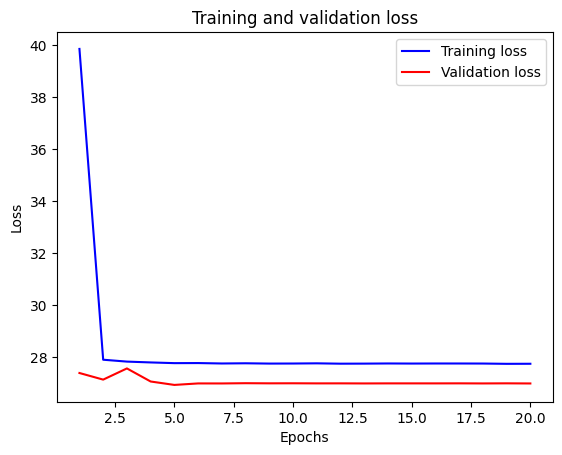

In [ ]:
# Accessing training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### e. Evaluate your model on the training set

In [ ]:
# Évaluer le modèle sur l'ensemble d'entraînement
train_loss, train_mae = model.evaluate(X_train_scaled, y_train, verbose=0)

print(f'Loss on training set: {train_loss:.4f}')
print(f'Mean Absolute Error on training set: {train_mae:.4f}')

KeyboardInterrupt: 

### f. Evaluate your model on the test set

In [ ]:
# Évaluer le modèle sur l'ensemble de test
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f'Loss on test set: {test_loss:.4f}')
print(f'Mean Absolute Error on test set: {test_mae:.4f}')

### g. Analyze your results

Look at your results for different horizons $h$ on the forecast of $\mbox{diff}(h)$ and compare them with the results of section 1. using imbalance. Please comment.

How could you improve this result?

21921/21921 [==============================] - 82s 4ms/step


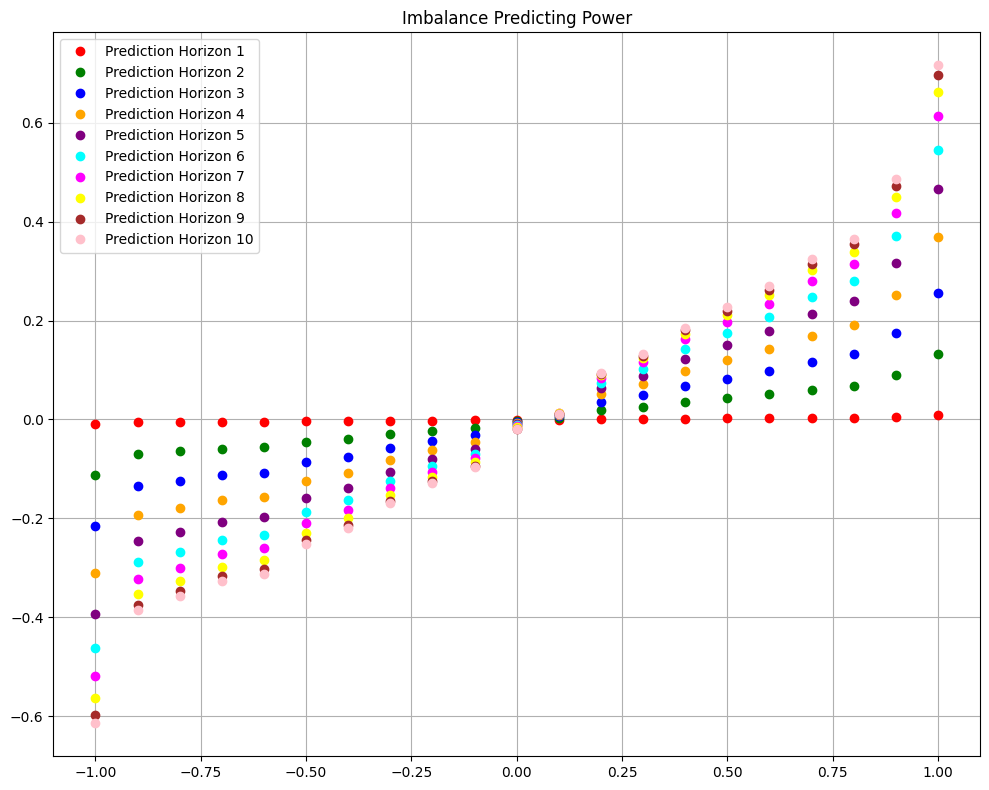

In [ ]:
predictions = model.predict(X_test_scaled)

new_df_temp = pd.DataFrame({'imb': X_test[:,-1].round(1),'dp1_bp': predictions[:,0],'dp2_bp': predictions[:,1],'dp3_bp': predictions[:,2],
                            'dp4_bp': predictions[:,3],'dp5_bp': predictions[:,4],'dp6_bp': predictions[:,5],'dp7_bp': predictions[:,6],
                            'dp8_bp': predictions[:,7],'dp9_bp': predictions[:,8],'dp10_bp': predictions[:,9]})

colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink']
plt.figure(figsize=(10,8))
ax1 = plt.subplot(111)

disc_imb = X_test[:,-1].round(1)

for pred_horizon in range(1,11):
  dp_cn = 'dp{h}_bp'.format(h=pred_horizon)
  mean_pred_imb = new_df_temp.groupby(disc_imb)[[dp_cn]].mean()

  plt.plot(mean_pred_imb.index, mean_pred_imb.values.flatten(), 'o', label=f'Prediction Horizon {pred_horizon}', color=colors[pred_horizon-1])

plt.title('Imbalance Predicting Power', size=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()